In [66]:
import pandas as pd

In [67]:
# Replace the path with the correct path to your CSV file
file_path = '/home/costanza/Robot-Control-by-EEG-with-ML/results/experiment_results.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Change the columns names
data.columns = ['Subject', 'N° Exp', 'Model', 'Th', 'Execution Time', 'Left Movements', 'TN', 'FP', 'Right Movements', 'TP', 'FN']

# I want to remove the second column
data = data.drop('N° Exp', axis=1)

# Create new dataframes based on the subject

dataframe_g = data[data['Subject'] == 'g']
dataframe_c = data[data['Subject'] == 'c']


In [68]:
# Create a list with the mean values
g = {}

g['Execution Time'] = dataframe_g['Execution Time'].mean()
g['Left Movements'] = dataframe_g['Left Movements'].mean()
g['TN'] = dataframe_g['TN'].mean()
g['FP'] = dataframe_g['FP'].mean()
g['Missed Actions - L'] = 0
g['Right Movements'] = dataframe_g['Right Movements'].mean()
g['TP'] = dataframe_g['TP'].mean()
g['FN'] = dataframe_g['FN'].mean()
g['Missed Actions - R'] = 0
g['Accuracy'] = (g['TP'] + g['TN']) / (g['TP'] + g['TN'] + g['FP'] + g['FN'])
g['Error Rate'] = 1 - g['Accuracy']
g['Threshold'] = dataframe_g['Th'].mean()

c = {}
c['Execution Time'] = dataframe_c['Execution Time'].mean()
c['Left Movements'] = dataframe_c['Left Movements'].mean()
c['TN'] = dataframe_c['TN'].mean()
c['FP'] = dataframe_c['FP'].mean()
c['Missed Actions - L'] = 0
c['Right Movements'] = dataframe_c['Right Movements'].mean()
c['TP'] = dataframe_c['TP'].mean()
c['FN'] = dataframe_c['FN'].mean()
c['Missed Actions - R'] = 0
c['Accuracy'] = (c['TP'] + c['TN']) / (c['TP'] + c['TN'] + c['FP'] + c['FN'])
c['Error Rate'] = 1 - c['Accuracy']
c['Threshold'] = dataframe_c['Th'].mean()


In [69]:
# Replace the path with the correct path to your CSV file
file_path = '/home/costanza/Robot-Control-by-EEG-with-ML/results/experiment_results_threshold.csv'

# Read the CSV file into a DataFrame
data_th = pd.read_csv(file_path)

# Change the columns names
data_th.columns = ['N° Exp', 'Model', 'Th', 'Execution Time', 'Left Movements', 'TN', 'FP', 'Missed Actions - L', 'Right Movements', 'TP', 'FN', 'Missed Actions - R']

In [70]:
# Eliminate the last row
data_th = data_th.iloc[:-1]
# I want to remove the second column
data_th = data_th.drop('N° Exp', axis=1)

In [71]:
# Add a new column with the Subject values
data_th['Subject'] = ['g'] * 10 + ['c'] * 10

df_g_th = data_th[data_th['Subject'] == 'g']
df_c_th = data_th[data_th['Subject'] == 'c']

In [72]:
# Create a dict with the mean values

g_th = {}

g_th['Execution Time'] = df_g_th['Execution Time'].mean()
g_th['Left Movements'] = df_g_th['Left Movements'].mean()
g_th['TN'] = df_g_th['TN'].mean()
g_th['FP'] = df_g_th['FP'].mean()
g_th['Missed Actions - L'] = df_g_th['Missed Actions - L'].mean()
g_th['Right Movements'] = df_g_th['Right Movements'].mean()
g_th['TP'] = df_g_th['TP'].mean()
g_th['FN'] = df_g_th['FN'].mean()
g_th['Missed Actions - R'] = df_g_th['Missed Actions - R'].mean()
g_th['Accuracy'] = (g_th['TP'] + g_th['TN']) / (g_th['TP'] + g_th['TN'] + g_th['FP'] + g_th['FN'])
g_th['Error Rate'] = 1 - g_th['Accuracy']
g_th['Threshold'] = df_g_th['Th'].mean()

c_th = {}
c_th['Execution Time'] = df_c_th['Execution Time'].mean()
c_th['Left Movements'] = df_c_th['Left Movements'].mean()
c_th['TN'] = df_c_th['TN'].mean()
c_th['FP'] = df_c_th['FP'].mean()
c_th['Missed Actions - L'] = df_c_th['Missed Actions - L'].mean()
c_th['Right Movements'] = df_c_th['Right Movements'].mean()
c_th['TP'] = df_c_th['TP'].mean()
c_th['FN'] = df_c_th['FN'].mean()
c_th['Missed Actions - R'] = df_c_th['Missed Actions - R'].mean()
c_th['Accuracy'] = (c_th['TP'] + c_th['TN']) / (c_th['TP'] + c_th['TN'] + c_th['FP'] + c_th['FN'])
c_th['Error Rate'] = 1 - c_th['Accuracy']


In [80]:
c_th

{'Execution Time': 230.50965948104857,
 'Left Movements': 107.3,
 'TN': 39.8,
 'FP': 11.9,
 'Missed Actions - L': 55.6,
 'Right Movements': 83.7,
 'TP': 69.1,
 'FN': 0.0,
 'Missed Actions - R': 14.6,
 'Accuracy': 0.9014900662251655,
 'Error Rate': 0.09850993377483452}

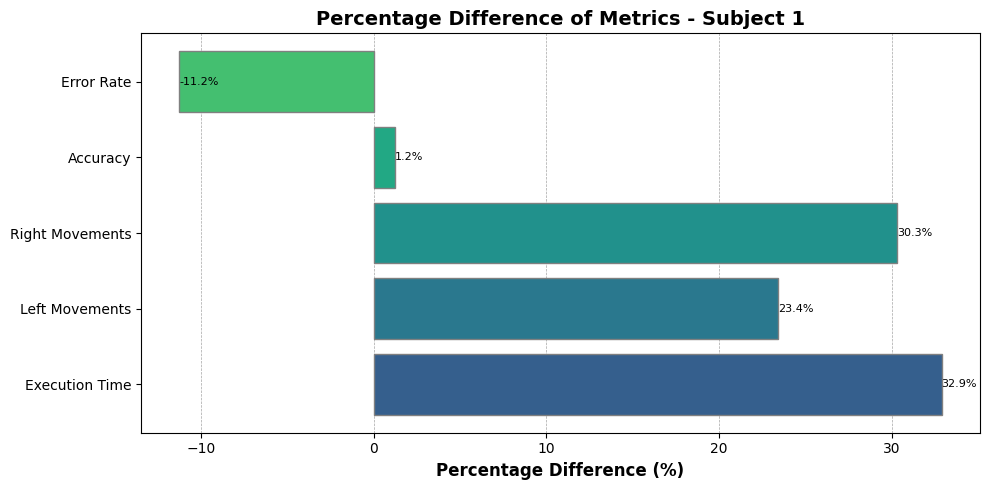

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Execution Time', 'Left Movements', 'Right Movements', 'Accuracy', 'Error Rate']

# Get the values for each metric with and without threshold
values_with_threshold = np.array([g_th[metric] for metric in metrics])
values_without_threshold = np.array([g[metric] for metric in metrics])

# Calculate the percentage difference
percentage_difference = ((values_with_threshold - values_without_threshold) / values_without_threshold) * 100

plt.figure(figsize=(10, 5))  # Adjust figure size for better layout

# Create the bars with a more appealing color
colors = plt.cm.viridis(np.linspace(0.3, 0.7, len(metrics)))  # Use a colormap for better visuals
bars = plt.barh(metrics, percentage_difference, color=colors, edgecolor='grey', height=0.8)

# Add grid lines behind the bars for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='x', alpha=0.7)
plt.gca().set_axisbelow(True)

# Customize tick labels for better clarity
plt.xticks(fontsize=10, fontweight='light')
plt.yticks(np.arange(len(metrics)), metrics, fontsize=10, fontweight='light')

# Add labels and title with adjusted font sizes
plt.xlabel('Percentage Difference (%)', fontsize=12, fontweight='bold')
plt.title('Percentage Difference of Metrics - Subject 1', fontsize=14, fontweight='bold')

# Optionally, add value labels to each bar for direct readability
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}%', 
             va='center', ha='left', fontsize=8, fontweight='light')

plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
plt.show()


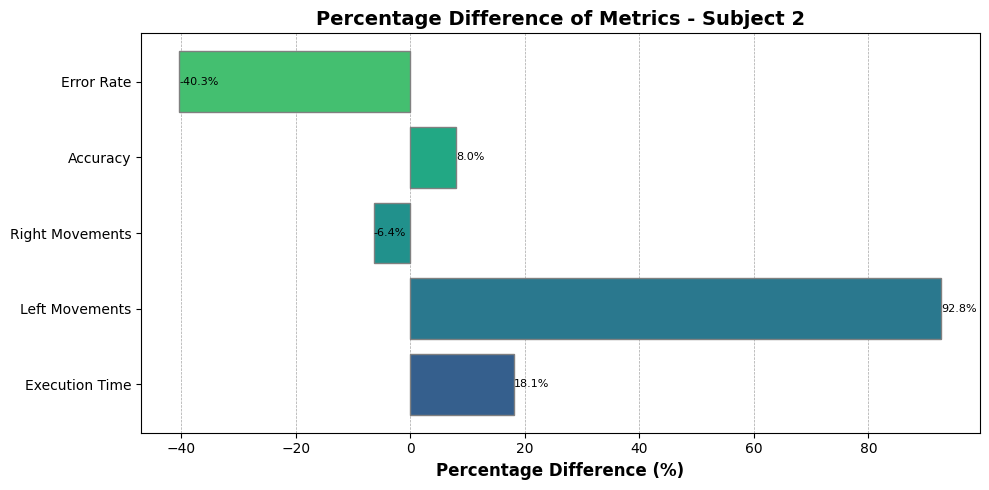

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Execution Time', 'Left Movements', 'Right Movements', 'Accuracy', 'Error Rate']

# Get the values for each metric with and without threshold
values_with_threshold = np.array([c_th[metric] for metric in metrics])
values_without_threshold = np.array([c[metric] for metric in metrics])

# Calculate the percentage difference
percentage_difference = ((values_with_threshold - values_without_threshold) / values_without_threshold) * 100

plt.figure(figsize=(10, 5))  # Adjust figure size for better layout

# Create the bars with a more appealing color
colors = plt.cm.viridis(np.linspace(0.3, 0.7, len(metrics)))  # Use a colormap for better visuals
bars = plt.barh(metrics, percentage_difference, color=colors, edgecolor='grey', height=0.8)

# Add grid lines behind the bars for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='x', alpha=0.7)
plt.gca().set_axisbelow(True)

# Customize tick labels for better clarity
plt.xticks(fontsize=10, fontweight='light')
plt.yticks(np.arange(len(metrics)), metrics, fontsize=10, fontweight='light')

# Add labels and title with adjusted font sizes
plt.xlabel('Percentage Difference (%)', fontsize=12, fontweight='bold')
plt.title('Percentage Difference of Metrics - Subject 2', fontsize=14, fontweight='bold')

# Optionally, add value labels to each bar for direct readability
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}%', 
             va='center', ha='left', fontsize=8, fontweight='light')

plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
plt.show()
